In [11]:
import pandas as pd
import seaborn as sns

In [12]:
train = pd.read_csv("diamonds_train.csv")
train = train.drop(train.columns[0], axis=1)
test = pd.read_csv("diamonds_test.csv")
test = test.drop(test.columns[0], axis=1)
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [13]:
print(train.shape)
print(train.columns)


(40345, 10)
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')


In [14]:
train.nunique(axis=0)

carat        265
cut            5
color          7
clarity        8
depth        175
table        124
x            538
y            534
z            361
price      10386
dtype: int64

In [15]:
train.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


['Ideal' 'Very Good' 'Premium' 'Good' 'Fair']
['H' 'D' 'F' 'G' 'I' 'E' 'J']
['VS2' 'VVS2' 'VS1' 'IF' 'SI1' 'SI2' 'VVS1' 'I1']


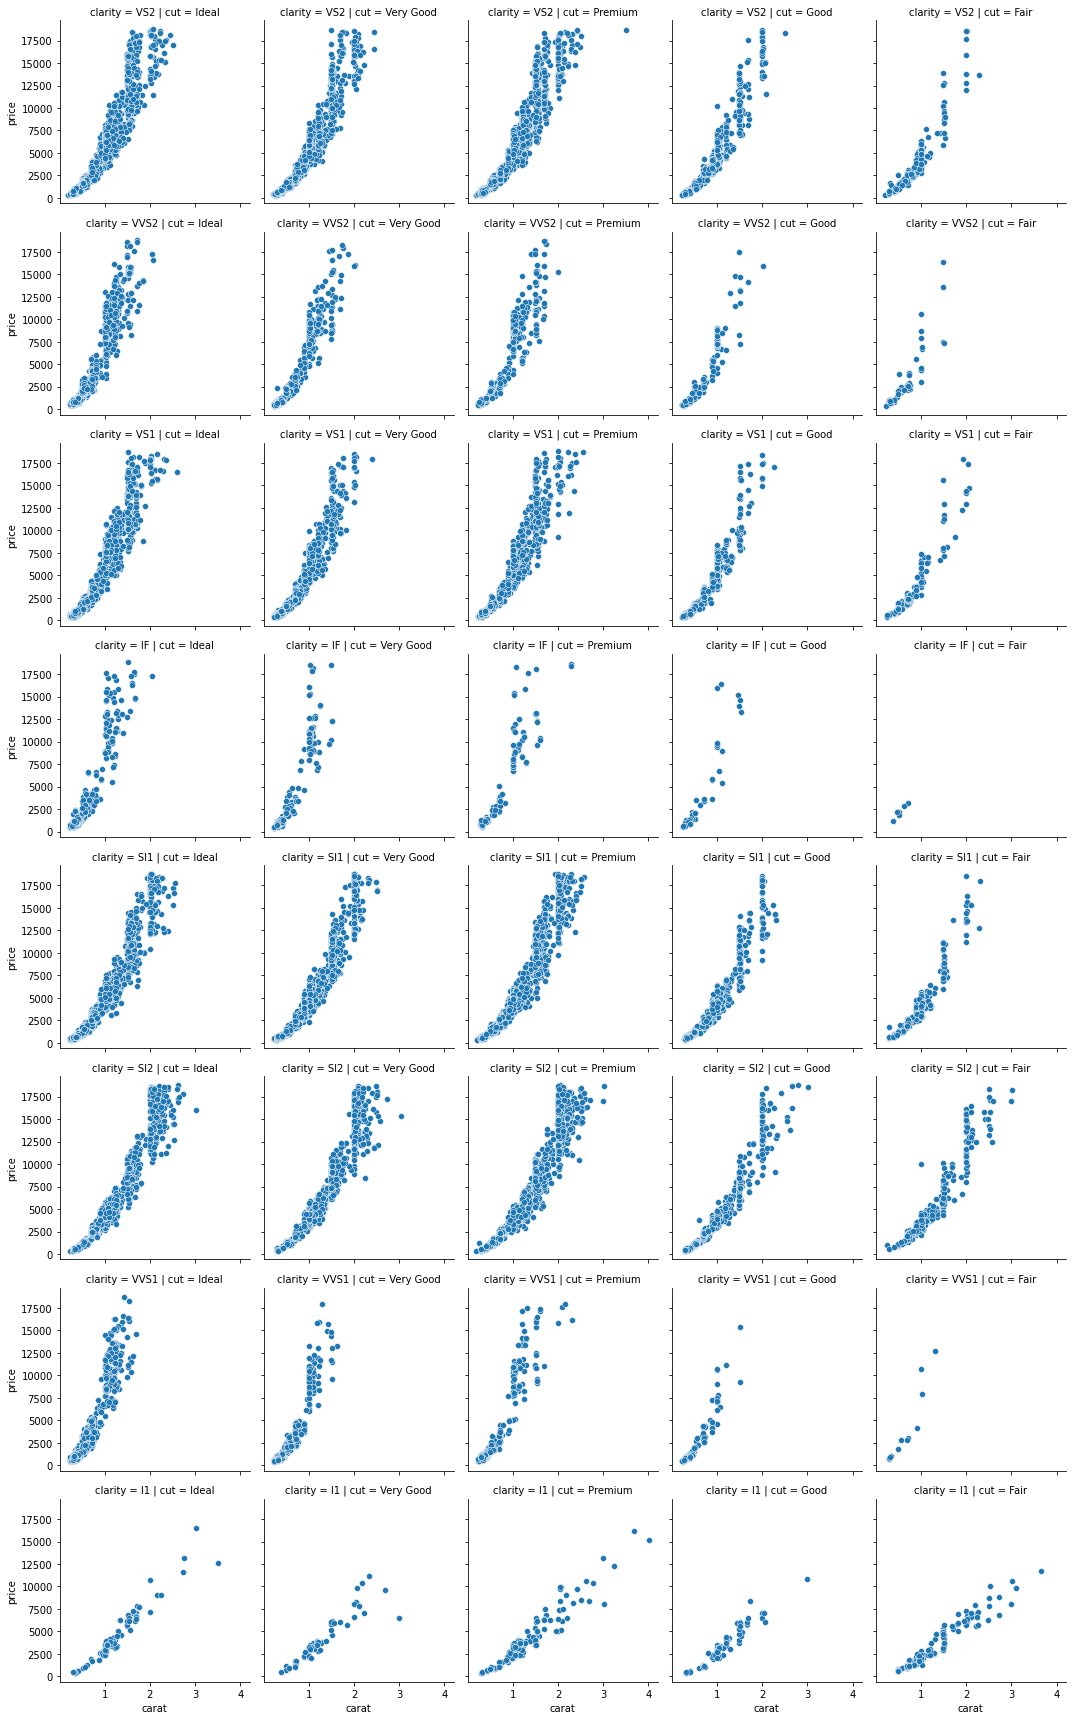

In [16]:
cat_features = train.select_dtypes(exclude=['number']).columns.to_list()

for f in cat_features:
    print(train[f].unique())

g = sns.FacetGrid(train, col="cut", row='clarity')
g.map(sns.scatterplot,'carat', 'price')


/home/renato/studies/ds/.venv/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


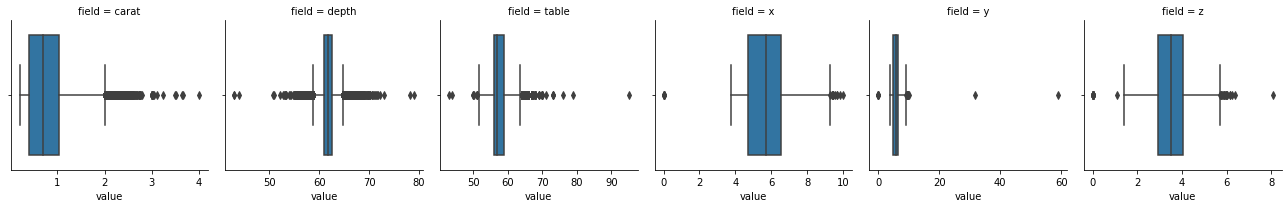

In [17]:
number_columns = train.select_dtypes(include=['number']).columns.to_list()[:-1]
bp = train.melt(value_vars = number_columns, var_name='field', ignore_index=True)
g = sns.FacetGrid(bp, col="field",sharex=False)
g.map(sns.boxplot, 'value')

<AxesSubplot:>

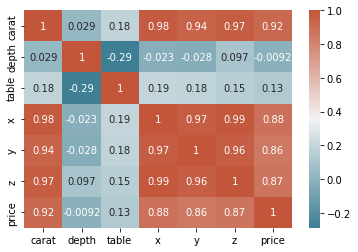

In [18]:
corr = train.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns, 
    annot=True, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True)
)

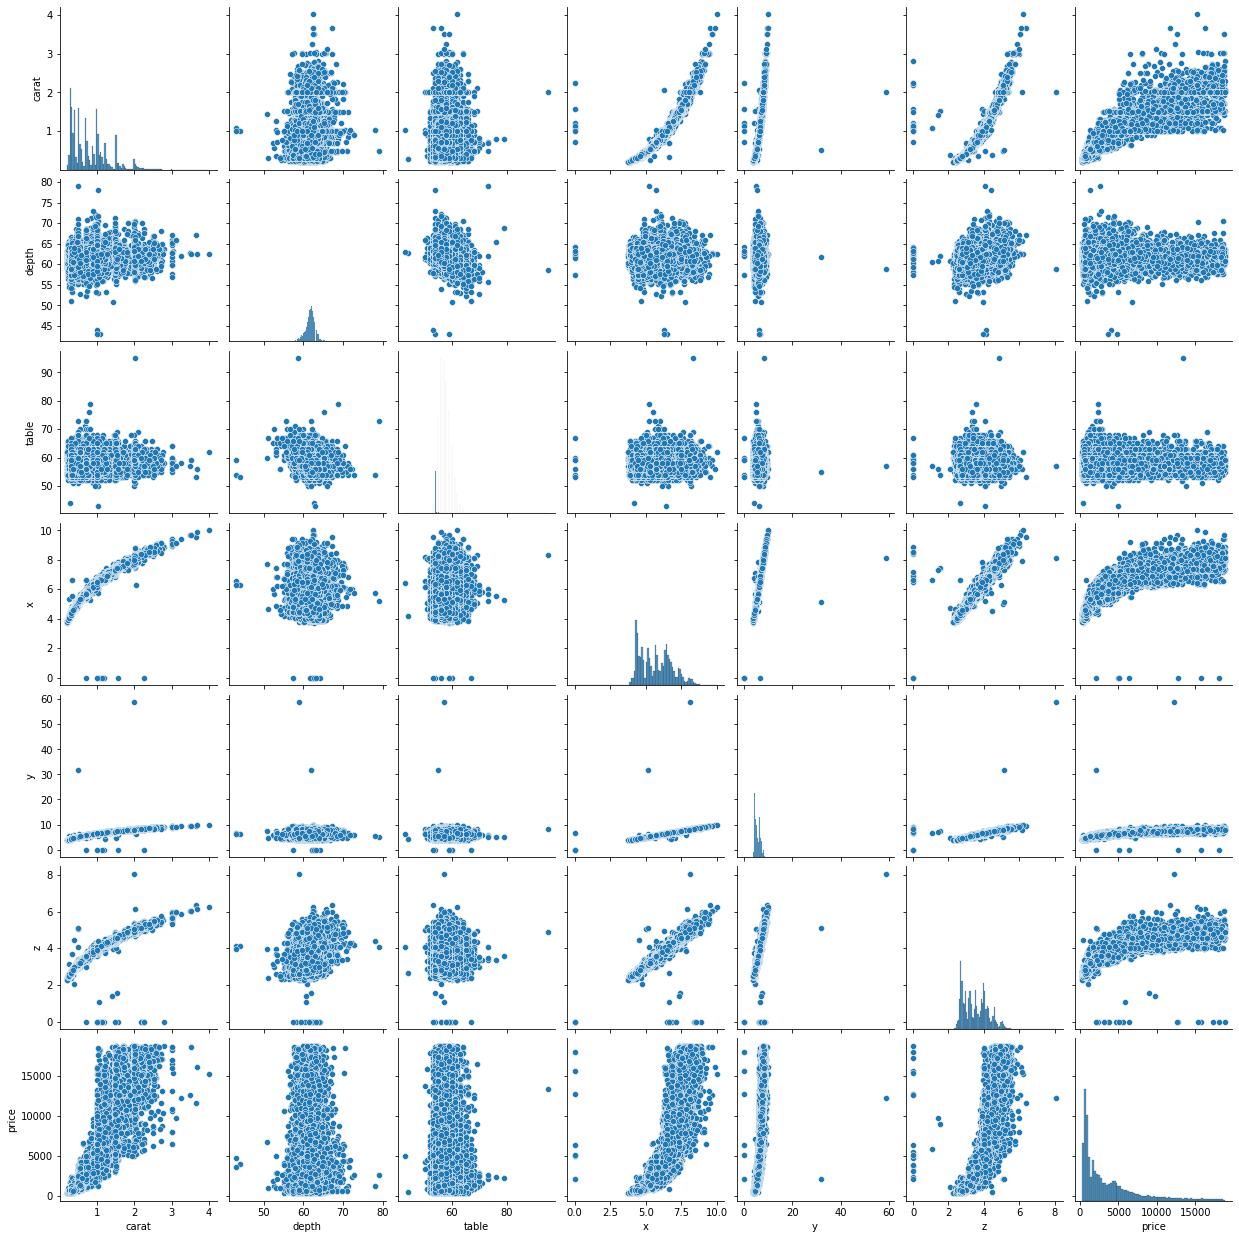

In [19]:
sns.pairplot(train)

# Cleaning

In [20]:
# returns a copy of dirty_df, without any column that has more than 
# a proportion of threshold na values
def drop_na_columns(dirty_df, threshold = .4):
    na_count = dirty_df.isna().sum()
    def na_filter(na_count, threshold = threshold):
        col_pass = []
        for i in na_count.keys():
            if na_count[i]/dirty_df.shape[0]<threshold:
                col_pass.append(i)
        return col_pass
    return dirty_df[na_filter(na_count)].copy()

# This code tests the function above.

# from random import random, seed, randint, uniform
# import numpy as np

# seed(42)

# dirty_df = train.copy()
# df_row_count = dirty_df.shape[0]
# dirty_columns_count = 10
# for i in range(dirty_columns_count):
#     na_percentage = uniform(.2, .8)
#     col_name = f"dirt{i+1}"
#     dirty_df[col_name] = [np.NaN if random() < na_percentage else randint(1, 100) for _ in range(df_row_count)]
#     print(col_name, na_percentage)

# all_columns_set = set(dirty_df.columns)
# cleaned_columns_set = set(drop_na_columns(dirty_df, threshold=.5).columns)
# all_columns_set - cleaned_columns_set


In [21]:
train_cleaned = drop_na_columns(train)
remove_x_outliers = (train_cleaned.x > 0)
remove_y_outliers = (train_cleaned.y > 0)
remove_z_outliers = (train_cleaned.z > 0)

train_cleaned = train_cleaned[remove_x_outliers & remove_y_outliers & remove_z_outliers]

In [22]:
train_cleaned.shape, train.shape

((40328, 10), (40345, 10))

# Model!!


In [ ]:
from sklearn import